In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [4]:

data = pd.read_csv('Test_data.csv')

In [5]:

data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [6]:

data.shape

(23490, 13)

In [7]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [8]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


## Step 1: Data Cleaning and Preparation

In [10]:
# Check the number of missing values in each column

data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [11]:
# Drop all the columns in which greater than 3000 missing values are present

for col in data.columns:
    if data[col].isnull().sum() > 3000:
        data.drop(col, 1, inplace=True)

In [12]:

data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [14]:
data.drop(['education'], axis = 1, inplace = True)

In [15]:

data.drop(['previous_year_rating'], axis = 1, inplace = True)

In [16]:

round(100*(data.isnull().sum()/len(data.index)), 2)

employee_id            0.0
department             0.0
gender                 0.0
recruitment_channel    0.0
no_of_trainings        0.0
age                    0.0
length_of_service      0.0
KPIs_met >80%          0.0
awards_won?            0.0
avg_training_score     0.0
dtype: float64

In [17]:
# Check the number of null values again

data.isnull().sum()

employee_id            0
department             0
gender                 0
recruitment_channel    0
no_of_trainings        0
age                    0
length_of_service      0
KPIs_met >80%          0
awards_won?            0
avg_training_score     0
dtype: int64

In [18]:
# Get the value counts of all the columns

for column in data:
    print(data[column].astype('category').value_counts())
    print('___________________________________________________')

employee_id
3        1
52221    1
52217    1
52216    1
52207    1
        ..
25757    1
25756    1
25755    1
25754    1
78295    1
Name: count, Length: 23490, dtype: int64
___________________________________________________
department
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: count, dtype: int64
___________________________________________________
gender
m    16596
f     6894
Name: count, dtype: int64
___________________________________________________
recruitment_channel
other       13078
sourcing     9961
referred      451
Name: count, dtype: int64
___________________________________________________
no_of_trainings
1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
8        2
9        2
Name: count, dtype: int64
___________________________________________________

In [20]:
data['recruitment_channel'].astype('category').value_counts()

recruitment_channel
other       13078
sourcing     9961
referred      451
Name: count, dtype: int64

In [22]:
data['no_of_trainings'].astype('category').value_counts()

no_of_trainings
1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
8        2
9        2
Name: count, dtype: int64

In [24]:
data['length_of_service'].value_counts()

length_of_service
3     3033
4     2911
2     2870
5     2592
7     2344
6     2038
1     1992
8     1263
9     1070
10     941
11     352
12     328
13     271
14     261
15     240
16     212
17     204
18     166
19     142
20      62
23      31
21      29
22      27
25      24
24      18
27      16
26      14
28      12
29      10
31       7
30       6
34       2
33       1
32       1
Name: count, dtype: int64

Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [24]:
# leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [92]:
# leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [30]:
data['recruitment_channel'].isnull().sum()

0

In [94]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

# leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [95]:
# Check the number of null values again

# leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [31]:
# Check the number of null values again

data.isnull().sum()

employee_id            0
department             0
gender                 0
recruitment_channel    0
no_of_trainings        0
age                    0
length_of_service      0
KPIs_met >80%          0
awards_won?            0
avg_training_score     0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [98]:
# Drop the null value rows in the column 'TotalVisits'

# leads = leads[~pd.isnull(leads['TotalVisits'])]

In [99]:
# Check the null values again

# leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [100]:
# Drop the null values rows in the column 'Lead Source'

# leads = leads[~pd.isnull(leads['Lead Source'])]

In [37]:
# Check the number of null values again

data['awards_won?']

0        0
1        0
2        0
3        0
4        0
        ..
23485    0
23486    0
23487    0
23488    0
23489    0
Name: awards_won?, Length: 23490, dtype: int64

In [102]:
# Drop the null values rows in the column 'Specialization'

# leads = leads[~pd.isnull(leads['Specialization'])]

In [103]:
# Check the number of null values again

# leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [33]:
print(len(data.index))
print(len(data.index)/23490)

23490
1.0


We still have around 69% of the rows which seems good enough.

In [34]:
# Let's look at the dataset again

data.head()

,employee_id,department,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,m,sourcing,1,24,1,1,0,77
1,74430,HR,f,other,1,31,5,0,0,51
2,72255,Sales & Marketing,m,other,1,31,4,0,0,47
3,38562,Procurement,f,other,3,31,9,0,0,65
4,64486,Finance,m,sourcing,1,30,7,0,0,61


In [42]:
data.drop(['awards_won?'], axis = 1, inplace=True)

In [43]:
data.head()

,employee_id,department,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,avg_training_score
0,8724,Technology,m,sourcing,1,24,1,1,77
1,74430,HR,f,other,1,31,5,0,51
2,72255,Sales & Marketing,m,other,1,31,4,0,47
3,38562,Procurement,f,other,3,31,9,0,65
4,64486,Finance,m,sourcing,1,30,7,0,61


### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [45]:
# Check the columns which are of type 'object'

temp = data.loc[:, data.dtypes == 'object']
temp.columns




Index(['department', 'gender', 'recruitment_channel'], dtype='object')

In [49]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(data[['department','gender','recruitment_channel']], drop_first=True)

# Add the results to the master dataframe
data = pd.concat([data, dummy], axis=1)


data['recruitment_channel']

0        sourcing
1           other
2           other
3           other
4        sourcing
           ...   
23485    sourcing
23486    sourcing
23487    sourcing
23488    sourcing
23489       other
Name: recruitment_channel, Length: 23490, dtype: object

In [51]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

# dummy_spl = pd.get_dummies(data['recruitment_channel'], prefix = 'recruitment_channel')
# dummy_spl = dummy_spl.drop(['recruitment_channel_other'], 1)
# data = pd.concat([data, dummy_spl], axis = 1)

In [52]:
# Drop the variables for which the dummy variables have been created

# data = data.drop(['department','gender','recruitment_channel'], 1)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [64]:
# Let's take a look at the dataset again


# data.drop(['department_Legal'], axis = 1, inplace=True)
data.head()


,employee_id,department,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,avg_training_score,department_Finance,...,department_Finance,department_HR,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,Technology,m,sourcing,1,24,1,1,77,False,...,False,False,False,False,False,False,True,True,False,True
1,74430,HR,f,other,1,31,5,0,51,False,...,False,True,False,False,False,False,False,False,False,False
2,72255,Sales & Marketing,m,other,1,31,4,0,47,False,...,False,False,False,False,False,True,False,True,False,False
3,38562,Procurement,f,other,3,31,9,0,65,False,...,False,False,False,True,False,False,False,False,False,False
4,64486,Finance,m,sourcing,1,30,7,0,61,True,...,True,False,False,False,False,False,False,True,False,True


In [68]:
data.drop(['recruitment_channel_referred'],axis=1, inplace = True)
data.drop(['department_Operations'],axis=1, inplace = True)


KeyError: "['recruitment_channel_referred'] not found in axis"

### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [69]:
# Import the required library

from sklearn.model_selection import train_test_split
data.head()

,employee_id,department,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,avg_training_score,department_Finance,...,recruitment_channel_sourcing,department_Finance,department_HR,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_sourcing
0,8724,Technology,m,sourcing,1,24,1,1,77,False,...,True,False,False,False,False,False,False,True,True,True
1,74430,HR,f,other,1,31,5,0,51,False,...,False,False,True,False,False,False,False,False,False,False
2,72255,Sales & Marketing,m,other,1,31,4,0,47,False,...,False,False,False,False,False,False,True,False,True,False
3,38562,Procurement,f,other,3,31,9,0,65,False,...,False,False,False,False,True,False,False,False,False,False
4,64486,Finance,m,sourcing,1,30,7,0,61,True,...,True,True,False,False,False,False,False,False,True,True


In [77]:
# Put all the feature variables in X
X = data.drop(['avg_training_score'], axis=1)
X.head()


,employee_id,department,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,department_Finance,department_HR,...,recruitment_channel_sourcing,department_Finance,department_HR,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_sourcing
0,8724,Technology,m,sourcing,1,24,1,1,False,False,...,True,False,False,False,False,False,False,True,True,True
1,74430,HR,f,other,1,31,5,0,False,True,...,False,False,True,False,False,False,False,False,False,False
2,72255,Sales & Marketing,m,other,1,31,4,0,False,False,...,False,False,False,False,False,False,True,False,True,False
3,38562,Procurement,f,other,3,31,9,0,False,False,...,False,False,False,False,True,False,False,False,False,False
4,64486,Finance,m,sourcing,1,30,7,0,True,False,...,True,True,False,False,False,False,False,False,True,True


In [79]:
# Put the target variable in y

y = data['avg_training_score']

y.head()

0    77
1    51
2    47
3    65
4    61
Name: avg_training_score, dtype: int64

In [80]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [72]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [81]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['no_of_trainings', 'length_of_service', 'KPIs_met >80%']] = scaler.fit_transform(X_train[['no_of_trainings', 'length_of_service', 'KPIs_met >80%']])

X_train.head()

,employee_id,department,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,department_Finance,department_HR,...,recruitment_channel_sourcing,department_Finance,department_HR,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_sourcing
1454,57043,Analytics,m,sourcing,0.0,32,0.151515,0.0,False,False,...,True,False,False,False,False,False,False,False,True,True
680,50441,Technology,m,other,0.0,44,0.424242,0.0,False,False,...,False,False,False,False,False,False,False,True,True,False
22595,50438,Sales & Marketing,m,sourcing,0.0,38,0.151515,0.0,False,False,...,True,False,False,False,False,False,True,False,True,True
471,27264,Procurement,m,other,0.0,24,0.000000,1.0,False,False,...,False,False,False,False,True,False,False,False,True,False
20979,30454,Analytics,f,other,0.0,27,0.090909,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
# Looking at the correlation table

data.corr(numeric_only=True)

,employee_id,no_of_trainings,age,length_of_service,KPIs_met >80%,avg_training_score,department_Finance,department_HR,department_Operations,department_Procurement,...,recruitment_channel_sourcing,department_Finance,department_HR,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_sourcing
employee_id,1.000000,-0.005433,0.000920,0.011781,0.006285,-0.011735,0.010710,0.005437,-0.000383,-0.014917,...,-0.000427,0.010710,0.005437,-0.000383,-0.014917,0.003250,0.009765,-0.005377,0.002769,-0.000427
no_of_trainings,-0.005433,1.000000,-0.085509,-0.061095,-0.040020,0.048121,0.021757,-0.069142,-0.066809,0.055075,...,-0.003217,0.021757,-0.069142,-0.066809,0.055075,0.022541,0.015646,-0.005405,0.084591,-0.003217
age,0.000920,-0.085509,1.000000,0.644515,-0.027661,-0.035823,-0.066439,-0.014116,0.087177,0.067417,...,-0.008848,-0.066439,-0.014116,0.087177,0.067417,-0.035308,-0.010261,0.007605,-0.021359,-0.008848
length_of_service,0.011781,-0.061095,0.644515,1.000000,-0.078121,-0.028643,-0.042216,-0.009605,0.072447,0.039101,...,-0.005574,-0.042216,-0.009605,0.072447,0.039101,-0.034817,-0.005025,0.003569,-0.013268,-0.005574
KPIs_met >80%,0.006285,-0.040020,-0.027661,-0.078121,1.000000,0.072981,0.017507,-0.004370,0.089730,0.014934,...,-0.004551,0.017507,-0.004370,0.089730,0.014934,0.023641,-0.115548,-0.006491,-0.039216,-0.004551
avg_training_score,-0.011735,0.048121,-0.035823,-0.028643,0.072981,1.000000,-0.048388,-0.212606,-0.111409,0.197124,...,-0.020882,-0.048388,-0.212606,-0.111409,0.197124,0.217889,-0.660739,0.474531,-0.025590,-0.020882
department_Finance,0.010710,0.021757,-0.066439,-0.042216,0.017507,-0.048388,1.000000,-0.048567,-0.111317,-0.084770,...,0.001784,1.000000,-0.048567,-0.111317,-0.084770,-0.030492,-0.148417,-0.084625,0.021854,0.001784
department_HR,0.005437,-0.069142,-0.014116,-0.009605,-0.004370,-0.212606,-0.048567,1.000000,-0.110996,-0.084525,...,-0.000861,-0.048567,1.000000,-0.110996,-0.084525,-0.030404,-0.147988,-0.084381,-0.059937,-0.000861
department_Operations,-0.000383,-0.066809,0.087177,0.072447,0.089730,-0.111409,-0.111317,-0.110996,1.000000,-0.193735,...,0.012171,-0.111317,-0.110996,1.000000,-0.193735,-0.069687,-0.339194,-0.193404,-0.133420,0.012171
department_Procurement,-0.014917,0.055075,0.067417,0.039101,0.014934,0.197124,-0.084770,-0.084525,-0.193735,1.000000,...,-0.009944,-0.084770,-0.084525,-0.193735,1.000000,-0.053068,-0.258303,-0.147281,-0.132021,-0.009944


In [95]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(X_train)
print(y_train)

       employee_id         department gender recruitment_channel  \
1454         57043          Analytics      m            sourcing   
680          50441         Technology      m               other   
22595        50438  Sales & Marketing      m            sourcing   
471          27264        Procurement      m               other   
20979        30454          Analytics      f               other   
...            ...                ...    ...                 ...   
79            9214         Operations      f            sourcing   
12119        69446         Operations      f               other   
14147        38586                R&D      m               other   
23320        46569  Sales & Marketing      m            sourcing   
5640         28590  Sales & Marketing      m            sourcing   

       no_of_trainings  age  length_of_service  KPIs_met >80%  \
1454             0.000   32           0.151515            0.0   
680              0.000   44           0.424242       

In [96]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Use RFE with named arguments
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

ValueError: could not convert string to float: 'Analytics'

In [97]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

AttributeError: 'RFE' object has no attribute 'support_'

In [123]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [124]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [125]:
# Import statsmodels

import statsmodels.api as sm

In [126]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Fri, 08 Nov 2019   Deviance:                       4145.5
Time:                        12:24:30   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [127]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [129]:
X_train.drop('Features', axis = 1, inplace = True)

In [130]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Fri, 08 Nov 2019   Deviance:                       4146.5
Time:                        12:24:31   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

The variable `Lead Profile_Dual Specialization Student	` also needs to be dropped.

In [131]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


In [99]:
X_train.drop('', axis = 1, inplace = True)

KeyError: "[''] not found in axis"

In [133]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Fri, 08 Nov 2019   Deviance:                       4152.2
Time:                        12:24:31   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [134]:
X_train.drop('', axis = 1, inplace = True)

In [98]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

NameError: name 'sm' is not defined

In [136]:
X_train.drop('', axis = 1, inplace = True)

In [142]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Fri, 08 Nov 2019   Deviance:                       4158.1
Time:                        12:26:47   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [138]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


We are good to go!

In [144]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [145]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [146]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [147]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [148]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [149]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [150]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [151]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [152]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Calculate the sensitivity

TP/(TP+FN)

0.739413680781759

In [154]:
# Calculate the specificity

TN/(TN+FP)

0.8343425605536332

In [155]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [157]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

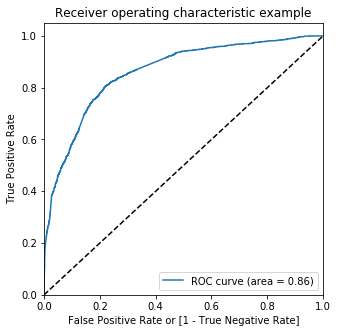

In [158]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [159]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [160]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


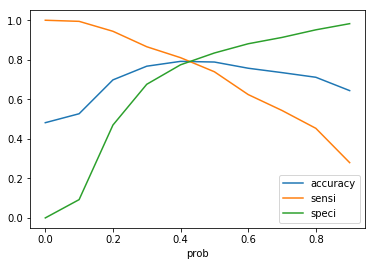

In [161]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [163]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [164]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [165]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Calculate Sensitivity

TP/(TP+FN)

0.793392275476966

In [167]:
# Calculate Specificity

TN/(TN+FP)

0.7884948096885813

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [168]:
# Scale the test set as well using just 'transform'

# X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [100]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

KeyError: 'avg_training_score'

In [102]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

NameError: name 'sm' is not defined

In [101]:
# Check X_test_sm

X_test_sm

NameError: name 'X_test_sm' is not defined

In [176]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [177]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [178]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [179]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [180]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [181]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [182]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [183]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [184]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [185]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [186]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [188]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [189]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [190]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7845188284518828

In [191]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 210],
       [202, 714]], dtype=int64)

In [192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [193]:
# Calculate sensitivity
TP / float(TP+FN)

0.7794759825327511

In [194]:
# Calculate specificity
TN / float(TN+FP)

0.7891566265060241

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [114]:
#Looking at the confusion matrix again

In [195]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

##### Precision
TP / TP + FP

In [196]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

##### Recall
TP / TP + FN

In [197]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.739413680781759

### Precision and recall tradeoff

In [198]:
from sklearn.metrics import precision_recall_curve

In [199]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      1
 14      0
 15      1
 16      1
 17      1
 18      1
 19      1
 20      0
 21      0
 22      1
 23      0
 24      0
 25      0
 26      1
 27      0
 28      1
 29      0
        ..
 4431    1
 4432    1
 4433    1
 4434    0
 4435    1
 4436    0
 4437    0
 4438    0
 4439    0
 4440    0
 4441    0
 4442    1
 4443    1
 4444    0
 4445    0
 4446    0
 4447    1
 4448    0
 4449    0
 4450    0
 4451    0
 4452    0
 4453    1
 4454    0
 4455    1
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      0
 14      1
 15      1
 16      1
 17      1
 18      1
 19      1
 20      0
 21      1
 22      1
 23      0
 24      0
 25      

In [200]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

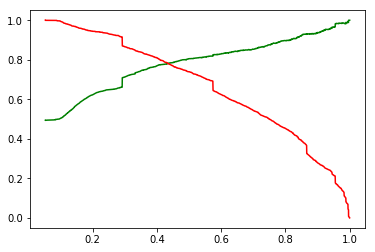

In [201]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [202]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [203]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [204]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [205]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [206]:
# Calculate Precision

TP/(TP+FP)

0.784037558685446

In [207]:
# Calculate Recall

TP/(TP+FN)

0.7771056305258259

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [210]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [211]:
y_test_pred[:10]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
3631    0.786460
dtype: float64

In [212]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [213]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996296
6122,0.129992
9202,0.703937
6570,0.299564
2668,0.720796


In [214]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [215]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [216]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [217]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [218]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [219]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996296
1,0,0.129992
2,0,0.703937
3,1,0.299564
4,1,0.720796


In [220]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [221]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996296,1
1,0,0.129992,0
2,0,0.703937,1
3,1,0.299564,0
4,1,0.720796,1


In [222]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7866108786610879

In [223]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[801, 195],
       [213, 703]], dtype=int64)

In [224]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [225]:
# Calculate Precision

TP/(TP+FP)

0.7828507795100222

In [226]:
# Calculate Recall

TP/(TP+FN)

0.767467248908297